In [3]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings("ignore")

In [4]:
def clean_text(text):
    text = text.replace('\n', ' ')
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def clean_digits(text):
    num_digits = sum(c.isdigit() for c in text)
    return (num_digits / len(text)) <= 0.6

In [5]:
classifiers = [
    ("Logistic Regression", LogisticRegression(max_iter=200)),
    ("Multinomial Naive Bayes", MultinomialNB()),
    ("Random Forest", RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ("SVM", SVC(probability=True)),
    ("KNN", KNeighborsClassifier())
]

vectorizers = [
    ("CountVectorizer", CountVectorizer()),
    ("TfidfVectorizer", TfidfVectorizer())
]

In [6]:
file_path = 'D:\\BSES - Data Analyst\\Sentiment Analysis\\Data\\Twitter_Comments.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')
df['Customer_Text'] = df['Customer_Text'].astype(str)
df

,Customer_Text,Department,Complaint_Type,BSES_Text,Sentiment
0,i am very shocked due to my electricity bill.....,Business,"Bill Related (Bill Download Issue, Wrong Bill)",sorry for the inconvenience caused. please pro...,Negative
1,can we know about the new base/guidelines abou...,Business,"Bill Related (Bill Download Issue, Wrong Bill)",it would be great if you could share your ca a...,Negative
2,\nit is third day of low voltage fluctuation i...,O&M,Voltage Fluctuation (Low & High),\nwe're getting this checked and will get back...,Negative
3,à¤à¤• à¤¦à¤® à¤®à¤œà¤¾à¤• à¤¬à¤¨à¤¾ à¤¦à¤¿à¤...,O&M,Power Outage,hey your complaint has been already registered...,Negative
4,à¤à¤• à¤¦à¤® à¤®à¤œà¤¾à¤• à¤¬à¤¨à¤¾ à¤¦à¤¿à¤...,O&M,Power Outage,we'll surely look into this for you. be assure...,NaN
...,...,...,...,...,...
50148,"here,s no electrical supply qhy you cut the el...",O&M,Power Outage,sorry for the inconvenience caused. please pro...,Negative
50149,no power for ca no 151791523,O&M,Power Outage,it would be great if you could share your cont...,Negative
50150,no electricity in our area my ca no is 101424877,O&M,Power Outage,sorry for the inconvenience caused. we have no...,Negative
50151,still no update\nwhen would be power restored,O&M,Power Outage,sorry for the inconvenience caused. please pro...,Negative


In [7]:
df.dropna(inplace=True)
df.drop(["Department", "Complaint_Type ", "BSES_Text"], axis='columns', inplace=True)
df

,Customer_Text,Sentiment
0,i am very shocked due to my electricity bill.....,Negative
1,can we know about the new base/guidelines abou...,Negative
2,\nit is third day of low voltage fluctuation i...,Negative
3,à¤à¤• à¤¦à¤® à¤®à¤œà¤¾à¤• à¤¬à¤¨à¤¾ à¤¦à¤¿à¤...,Negative
5,"\nnow that 30/6/20 is over, lab test must have...",Negative
...,...,...
50148,"here,s no electrical supply qhy you cut the el...",Negative
50149,no power for ca no 151791523,Negative
50150,no electricity in our area my ca no is 101424877,Negative
50151,still no update\nwhen would be power restored,Negative


In [8]:
df['Customer_Text'] = df['Customer_Text'].apply(clean_text)
df = df[df['Customer_Text'].str.strip() != '']
df = df[~df['Customer_Text'].str.isdigit()]
df = df[df['Customer_Text'].str.split().apply(len) > 1]
df

,Customer_Text,Sentiment
0,i am very shocked due to my electricity bill l...,Negative
1,can we know about the new baseguidelines about...,Negative
2,it is third day of low voltage fluctuation in ...,Negative
5,now that 30620 is over lab test must have be d...,Negative
7,no power supply in our area since last 30 min ...,Negative
...,...,...
50148,heres no electrical supply qhy you cut the ele...,Negative
50149,no power for ca no 151791523,Negative
50150,no electricity in our area my ca no is 101424877,Negative
50151,still no update when would be power restored,Negative


In [9]:
negative = df[df['Sentiment'] == 'Negative']
negative

,Customer_Text,Sentiment
0,i am very shocked due to my electricity bill l...,Negative
1,can we know about the new baseguidelines about...,Negative
2,it is third day of low voltage fluctuation in ...,Negative
5,now that 30620 is over lab test must have be d...,Negative
7,no power supply in our area since last 30 min ...,Negative
...,...,...
50148,heres no electrical supply qhy you cut the ele...,Negative
50149,no power for ca no 151791523,Negative
50150,no electricity in our area my ca no is 101424877,Negative
50151,still no update when would be power restored,Negative


In [10]:
positive = df[df['Sentiment'] == 'Positive']
positive

,Customer_Text,Sentiment
163,dear service provider thanks for the quick res...,Positive
480,thanks for the revised bill request you to pls...,Positive
499,thanks for the revised bill request you to pls...,Positive
540,this month as well done self reading on 03 jul...,Positive
1111,thanks for the same hope the issue gets resolv...,Positive
...,...,...
45027,today we tried to log in no current complaint ...,Positive
45276,thanks for your response i have sent you my nu...,Positive
46532,thanks for the confirmation but i have already...,Positive
47234,thanks for the reply sir can you tell me in ho...,Positive


In [11]:
neutral = df[df['Sentiment'] == 'Neutral']
neutral

,Customer_Text,Sentiment
31,tweets in the account are protected,Neutral
49,tweets are protected,Neutral
244,how much,Neutral
620,check dm,Neutral
903,tweet deleted,Neutral
...,...,...
48009,0 rate,Neutral
48171,but y,Neutral
48773,take to,Neutral
49035,check dm,Neutral


In [12]:
texts = df['Customer_Text']
sentiments = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(texts, sentiments, test_size=0.3, random_state=42)

In [13]:
results = []

for clf_name, clf in classifiers:
    for vec_name, vectorizer in vectorizers:
        X_train_feats = vectorizer.fit_transform(X_train)
        X_test_feats = vectorizer.transform(X_test)
        X_positive_feats = vectorizer.transform(positive['Customer_Text'])
        X_negative_feats = vectorizer.transform(negative['Customer_Text'])
        X_neutral_feats = vectorizer.transform(neutral['Customer_Text'])

        clf.fit(X_train_feats, y_train)
        
        y_pred = clf.predict(X_test_feats)
        y_pred_prob = clf.predict_proba(X_test_feats)
        
        accuracy = accuracy_score(y_test, y_pred)
        loss = log_loss(y_test, y_pred_prob)

        positive_pred = clf.predict(X_positive_feats)
        positive_accuracy = accuracy_score(positive['Sentiment'], positive_pred)

        negative_pred = clf.predict(X_negative_feats)
        negative_accuracy = accuracy_score(negative['Sentiment'], negative_pred)

        neutral_pred = clf.predict(X_neutral_feats)
        neutral_accuracy = accuracy_score(neutral['Sentiment'], neutral_pred)
        
        results.append((clf_name, vec_name, accuracy, loss, positive_accuracy, negative_accuracy, neutral_accuracy))

        print(f"{clf_name} + {vec_name}: Accuracy = {accuracy}, Loss = {loss}")
        print(f"Accuracy on Positive Data: {positive_accuracy}")
        print(f"Accuracy on Neutral Data: {neutral_accuracy}")
        print(f"Accuracy on Negative Data: {negative_accuracy}")
        print()

Logistic Regression + CountVectorizer: Accuracy = 0.9958586150438217, Loss = 0.013421212849998655
Accuracy on Positive Data: 0.8
Accuracy on Neutral Data: 0.5916666666666667
Accuracy on Negative Data: 0.9985182602632267

Logistic Regression + TfidfVectorizer: Accuracy = 0.9956659924877204, Loss = 0.016400022690010473
Accuracy on Positive Data: 0.02857142857142857
Accuracy on Neutral Data: 0.05
Accuracy on Negative Data: 0.9998837851186845

Multinomial Naive Bayes + CountVectorizer: Accuracy = 0.9950881248194163, Loss = 0.06670624473154421
Accuracy on Positive Data: 0.0
Accuracy on Neutral Data: 0.008333333333333333
Accuracy on Negative Data: 0.9990993346698045

Multinomial Naive Bayes + TfidfVectorizer: Accuracy = 0.9956659924877204, Loss = 0.04034859587651042
Accuracy on Positive Data: 0.0
Accuracy on Neutral Data: 0.0
Accuracy on Negative Data: 1.0

Random Forest + CountVectorizer: Accuracy = 0.9961475488779736, Loss = 0.028935368222259478
Accuracy on Positive Data: 0.785714285714285

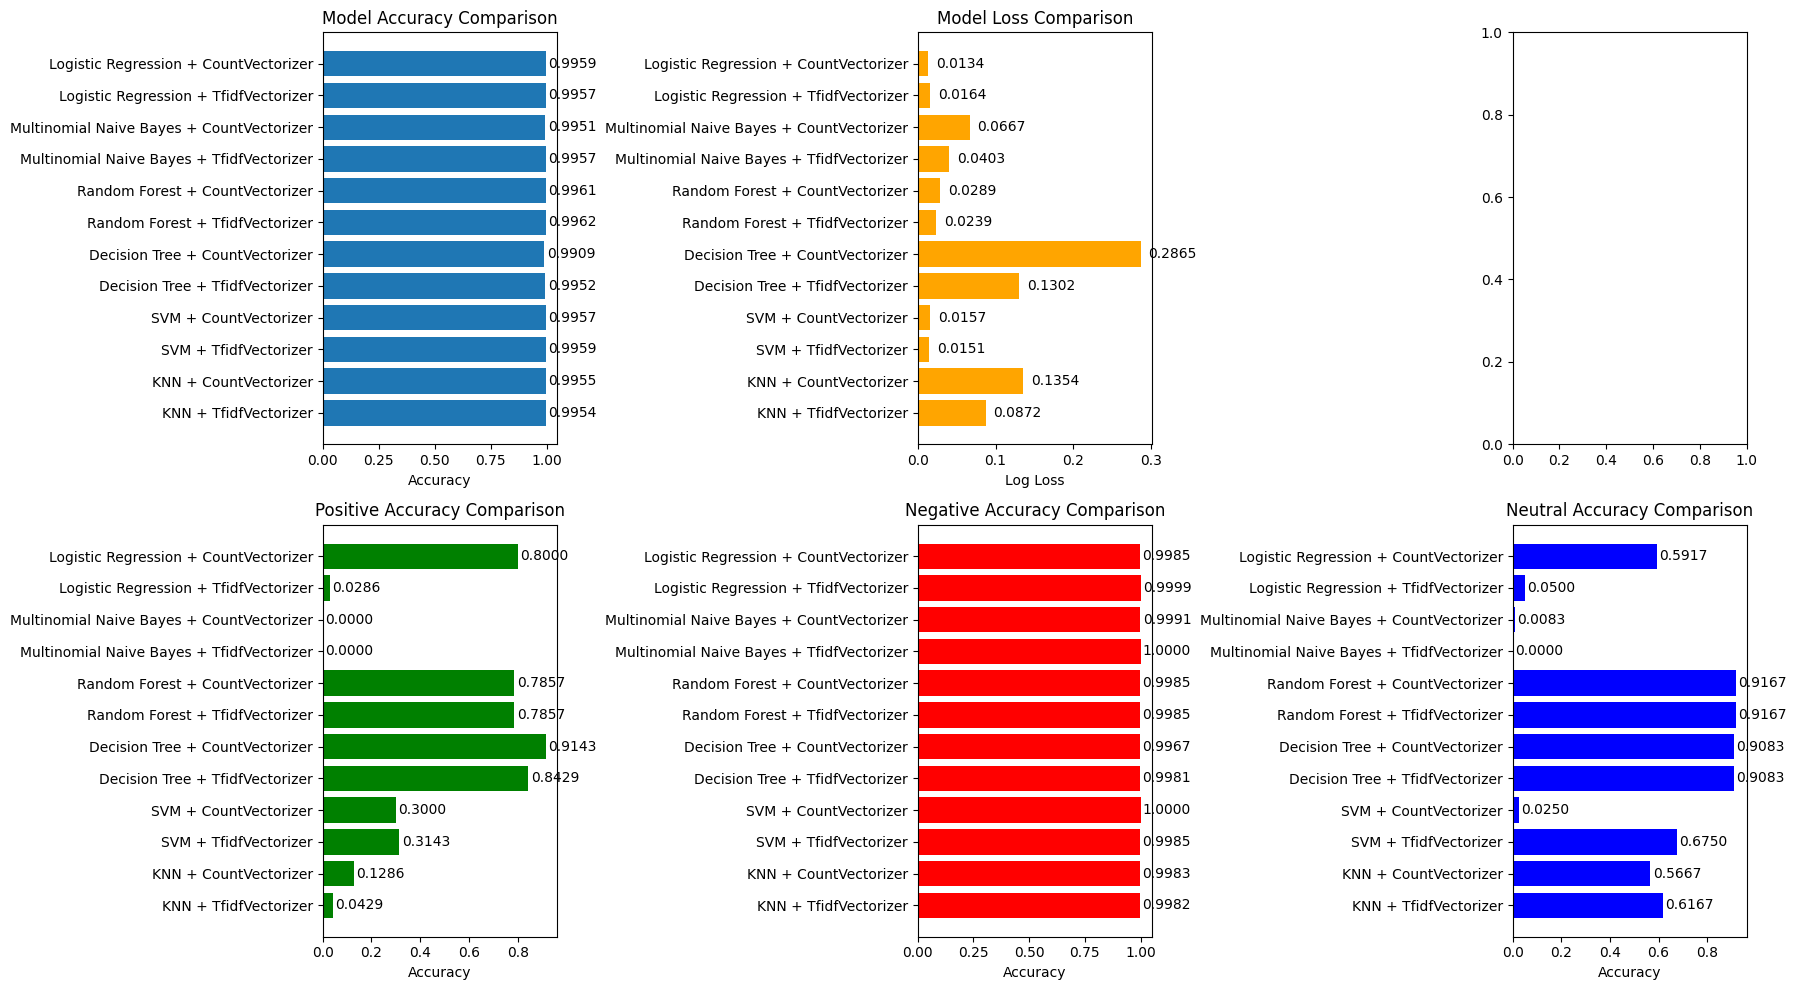

In [15]:
results_array = np.array(results, dtype=[('Classifier', 'U25'), ('Vectorizer', 'U25'), ('Accuracy', 'f8'), ('Loss', 'f8'), ('Positive_Accuracy', 'f8'), ('Negative_Accuracy', 'f8'), ('Neutral_Accuracy', 'f8')])
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

# Overall Accuracy plot
ax[0, 0].barh(range(len(results_array)), results_array['Accuracy'], align='center')
ax[0, 0].set_yticks(range(len(results_array)))
ax[0, 0].set_yticklabels([f"{clf} + {vec}" for clf, vec in zip(results_array['Classifier'], results_array['Vectorizer'])])
ax[0, 0].invert_yaxis()
ax[0, 0].set_xlabel('Accuracy')
ax[0, 0].set_title('Model Accuracy Comparison')
for i, accuracy in enumerate(results_array['Accuracy']):
    ax[0, 0].text(accuracy + 0.01, i, f"{accuracy:.4f}", va='center')

# Loss plot
ax[0, 1].barh(range(len(results_array)), results_array['Loss'], align='center', color='orange')
ax[0, 1].set_yticks(range(len(results_array)))
ax[0, 1].set_yticklabels([f"{clf} + {vec}" for clf, vec in zip(results_array['Classifier'], results_array['Vectorizer'])])
ax[0, 1].invert_yaxis()
ax[0, 1].set_xlabel('Log Loss')
ax[0, 1].set_title('Model Loss Comparison')
for i, loss in enumerate(results_array['Loss']):
    ax[0, 1].text(loss + 0.01, i, f"{loss:.4f}", va='center')

# Positive Accuracy plot
positive_accuracies = [positive_accuracy for _, _, _, _, positive_accuracy, _, _ in results]
ax[1, 0].barh(range(len(results_array)), positive_accuracies, align='center', color='green')
ax[1, 0].set_yticks(range(len(results_array)))
ax[1, 0].set_yticklabels([f"{clf} + {vec}" for clf, vec in zip(results_array['Classifier'], results_array['Vectorizer'])])
ax[1, 0].invert_yaxis()
ax[1, 0].set_xlabel('Accuracy')
ax[1, 0].set_title('Positive Accuracy Comparison')
for i, accuracy in enumerate(positive_accuracies):
    ax[1, 0].text(accuracy + 0.01, i, f"{accuracy:.4f}", va='center')

# Negative Accuracy plot
negative_accuracies = [negative_accuracy for _, _, _, _, _, negative_accuracy, _ in results]
ax[1, 1].barh(range(len(results_array)), negative_accuracies, align='center', color='red')
ax[1, 1].set_yticks(range(len(results_array)))
ax[1, 1].set_yticklabels([f"{clf} + {vec}" for clf, vec in zip(results_array['Classifier'], results_array['Vectorizer'])])
ax[1, 1].invert_yaxis()
ax[1, 1].set_xlabel('Accuracy')
ax[1, 1].set_title('Negative Accuracy Comparison')
for i, accuracy in enumerate(negative_accuracies):
    ax[1, 1].text(accuracy + 0.01, i, f"{accuracy:.4f}", va='center')

# Neutral Accuracy plot
neutral_accuracies = [neutral_accuracy for _, _, _, _, _, _, neutral_accuracy in results]
ax[1, 2].barh(range(len(results_array)), neutral_accuracies, align='center', color='blue')
ax[1, 2].set_yticks(range(len(results_array)))
ax[1, 2].set_yticklabels([f"{clf} + {vec}" for clf, vec in zip(results_array['Classifier'], results_array['Vectorizer'])])
ax[1, 2].invert_yaxis()
ax[1, 2].set_xlabel('Accuracy')
ax[1, 2].set_title('Neutral Accuracy Comparison')
for i, accuracy in enumerate(neutral_accuracies):
    ax[1, 2].text(accuracy + 0.01, i, f"{accuracy:.4f}", va='center')

plt.tight_layout()
plt.show()

## Final Model

In [31]:

fclassifier = DecisionTreeClassifier()
fvectorizer = CountVectorizer()

test = ["tweets in the account are protected", " tweets are protected", "tweet deleted"]

In [32]:
X_train_feats = fvectorizer.fit_transform(X_train)
X_test_feats = fvectorizer.transform(X_test)
test_feats = fvectorizer.transform(test)

fclassifier.fit(X_train_feats, y_train)
        
y_pred = fclassifier.predict(X_test_feats)
y_pred_prob = fclassifier.predict_proba(X_test_feats)

test_pred = fclassifier.predict(test_feats)

accuracy = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, y_pred_prob)
print(f"Accuracy = {accuracy}, Loss = {loss}")
print(test_pred)

Accuracy = 0.9917172300876432, Loss = 0.25534919545867213
['Neutral' 'Neutral' 'Neutral' 'Negative']
